<a href="https://colab.research.google.com/github/AlyasShah/Capstone-Project-World-Ranking-Universities/blob/main/Final_Project_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection


In [ ]:
# Import necessary libraries
import pandas as pd  # for analysis
import numpy as np     #for numerical computation]
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns      # for data visualization

In [ ]:
import pandas as pd

In [ ]:
df_raw = pd.read_csv('uniranking.csv', sep=';')

In [ ]:
df_raw.head()

World rank                                         University National rank  \
0    201-302                               University of Bochum         15-24   
1    303-401  The University of Texas Medical Branch at Galv...       113-138   
2    151-200                           Florida State University         70-89   
3    201-300                               Lancaster University         20-30   
4    101-150                            University of Groningen           3-6   

   Total score  Alumni  Award  Hi Ci   N&S   PUB   PCP  Year  \
0          NaN     0.0    0.0   12.6  11.8  38.9  19.6  2009   
1          NaN     0.0    0.0   17.8   8.4  27.8  15.6  2009   
2          NaN     0.0    0.0   20.4  18.4  39.5  19.0  2010   
3          NaN     0.0    0.0   17.6  11.9  28.7  19.7  2010   
4          NaN     0.0   19.9   17.6  16.3  46.2  26.7  2010   

   World rank integer         Country ISO2 CODE ISO3 CODE  \
0                 201         Germany        DE       DEU   
1                 303   United States        US       USA   
2                 151   United States        US       USA   
3                 201  United Kingdom        GB       GBR   
4                 101     Netherlands        NL       NLD   

                                           Geo Shape  \
0  {"coordinates": [[[9.9219063656, 54.983104153]...   
1  {"coordinates": [[[[-155.54211, 19.08348], [-1...   
2  {"coordinates": [[[[-155.54211, 19.08348], [-1...   
3  {"coordinates": [[[[-5.6619486149, 54.55460317...   
4  {"coordinates": [[[6.07418257, 53.5104033474],...   

                    Geo Point 2D  
0   51.1337226904, 10.2884850927  
1  45.7056295354, -112.599438377  
2  45.7056295354, -112.599438377  
3   53.9147734806, -2.8531353952  
4   52.2987003744, 5.51221710099

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World rank          7105 non-null   object 
 1   University          7105 non-null   object 
 2   National rank       7105 non-null   object 
 3   Total score         1403 non-null   float64
 4   Alumni              7105 non-null   float64
 5   Award               7105 non-null   float64
 6   Hi Ci               7105 non-null   float64
 7   N&S                 7082 non-null   float64
 8   PUB                 7105 non-null   float64
 9   PCP                 7105 non-null   float64
 10  Year                7105 non-null   int64  
 11  World rank integer  7105 non-null   int64  
 12  Country             7100 non-null   object 
 13  ISO2 CODE           7100 non-null   object 
 14  ISO3 CODE           7100 non-null   object 
 15  Geo Shape           7100 non-null   object 
 16  Geo Po

In [ ]:
df_raw.shape

(7105, 17)

In [ ]:
df_raw.describe()

Total score       Alumni        Award        Hi Ci          N&S  \
count  1403.000000  7105.000000  7105.000000  7105.000000  7082.000000   
mean     36.406700     8.334722     7.039564    15.794483    15.283564   
std      13.410997    13.406220    14.883308    13.789189    12.015975   
min      23.500000     0.000000     0.000000     0.000000     0.000000   
25%      27.500000     0.000000     0.000000     7.300000     7.800000   
50%      31.500000     0.000000     0.000000    12.800000    12.200000   
75%      41.400000    14.400000    11.200000    20.800000    18.800000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

               PUB          PCP         Year  World rank integer  
count  7105.000000  7105.000000  7105.000000         7105.000000  
mean     38.265489    21.378114  2011.483603          216.319634  
std      12.783429     9.049153     4.029528          125.028979  
min       7.300000     8.300000  2005.000000            1.000000  
25%      29.300000    15.900000  2008.000000          101.000000  
50%      36.100000    19.300000  2011.000000          201.000000  
75%      44.800000    24.400000  2015.000000          301.000000  
max     100.000000   100.000000  2018.000000          403.000000

# Data Cleaning

In [ ]:
df_raw.isnull().sum()

World rank               0
University               0
National rank            0
Total score           5702
Alumni                   0
Award                    0
Hi Ci                    0
N&S                     23
PUB                      0
PCP                      0
Year                     0
World rank integer       0
Country                  5
ISO2 CODE                5
ISO3 CODE                5
Geo Shape                5
Geo Point 2D             5
dtype: int64

# Filling Missing Value

Now we will tackle the NaN value of the total score of the award. With the data set given, we calculate the total score based on the criteria and percentage given. These are the detail of scoring of Shanghai ARWU Rankings:
Alumni =10%,
Alumni=20%
Award=20%
HiCi=20%
N&S=20%
PUB=20%
PCP=10%


In [ ]:
indicators = ['Alumni', 'Award', 'Hi Ci', 'N&S', 'PUB', 'PCP']
weights = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]

# Calculate the filled Total score based on indicators and weights
df_raw['Filled_Total_score'] = df_raw[indicators].fillna(0).dot(weights)

# Fill missing Total score values with the calculated values
df_raw.iloc[:, 3].fillna(df_raw['Filled_Total_score'], inplace=True)

# Drop the intermediate column
df_raw.drop(columns=['Filled_Total_score'], inplace=True)

In [ ]:
df_raw.isnull().sum()

World rank             0
University             0
National rank          0
Total score            0
Alumni                 0
Award                  0
Hi Ci                  0
N&S                   23
PUB                    0
PCP                    0
Year                   0
World rank integer     0
Country                5
ISO2 CODE              5
ISO3 CODE              5
Geo Shape              5
Geo Point 2D           5
dtype: int64

In [ ]:
df_clean = df_raw.drop(columns=[ 'Geo Shape', 'Geo Point 2D', 'PCP' ])  # here we dlt unncessary column
df_clean.head(14)

World rank                                         University  \
0     201-302                               University of Bochum   
1     303-401  The University of Texas Medical Branch at Galv...   
2     151-200                           Florida State University   
3     201-300                               Lancaster University   
4     101-150                            University of Groningen   
5     301-400                     University of Southern Denmark   
6          16                           University of Washington   
7     151-200                              University of Hamburg   
8     301-400                           Eotvos Lorand University   
9          71                   Ecole Normale Superieure - Paris   
10    101-150                      Tokyo Institute of Technology   
11    151-200                                 University of Bern   
12    301-400                       University of Duisburg-Essen   
13    151-200                               University of Durham   

   National rank  Total score  Alumni  Award  Hi Ci   N&S   PUB  Year  \
0          15-24        14.62     0.0    0.0   12.6  11.8  38.9  2009   
1        113-138        12.36     0.0    0.0   17.8   8.4  27.8  2009   
2          70-89        17.56     0.0    0.0   20.4  18.4  39.5  2010   
3          20-30        13.61     0.0    0.0   17.6  11.9  28.7  2010   
4            3-6        22.67     0.0   19.9   17.6  16.3  46.2  2010   
5              4        12.51     0.0    0.0   14.4   9.3  31.1  2010   
6             14        48.70    24.4   31.7   53.9  51.6  72.5  2010   
7          11-14        16.95    14.1    0.0   17.6  16.4  34.3  2010   
8            1-2        11.69    16.9    0.0   10.2   9.0  24.2  2010   
9              3        28.30    50.8   24.4   12.5  18.7  27.9  2010   
10             6        22.12    14.1    0.0   21.6  22.8  44.4  2010   
11             6        17.97    14.1    0.0   10.2  20.8  39.1  2010   
12         24-33        11.01     0.0    0.0    7.2   8.8  31.7  2010   
13         15-19        16.23     0.0    0.0   19.0  18.6  33.3  2010   

    World rank integer         Country ISO2 CODE ISO3 CODE  
0                  201         Germany        DE       DEU  
1                  303   United States        US       USA  
2                  151   United States        US       USA  
3                  201  United Kingdom        GB       GBR  
4                  101     Netherlands        NL       NLD  
5                  301         Denmark        DK       DNK  
6                   16   United States        US       USA  
7                  151         Germany        DE       DEU  
8                  301         Hungary        HU       HUN  
9                   71          France        FR       FRA  
10                 101           Japan        JP       JPN  
11                 151     Switzerland        CH       CHE  
12                 301         Germany        DE       DEU  
13                 151  United Kingdom        GB       GBR

In [ ]:
# sort by rank, then year
df_sort_rank = df_clean.sort_values(by=["World rank integer", "World rank"])
df_sort_rank

World rank                 University National rank  Total score  Alumni  \
78            1         Harvard University             1       100.00   100.0   
186           1         Harvard University             1       100.00   100.0   
552           1         Harvard University             1       100.00   100.0   
1100          1         Harvard University             1       100.00   100.0   
1565          1         Harvard University             1       100.00   100.0   
...         ...                        ...           ...          ...     ...   
6963    403-510     University of Rennes 1         19-23         9.61     0.0   
6964    403-510  The University of Memphis       141-166         8.22     0.0   
6965    403-510           Nihon University         19-33         9.51     0.0   
6970    403-510        Istanbul University             1         9.55    16.6   
6972    403-510        Nagasaki University         19-33         9.68     0.0   

      Award  Hi Ci    N&S    PUB  Year  World rank integer        Country  \
78    100.0  100.0  100.0  100.0  2016                   1  United States   
186   100.0  100.0  100.0  100.0  2005                   1  United States   
552   100.0  100.0  100.0  100.0  2007                   1  United States   
1100  100.0  100.0  100.0  100.0  2008                   1  United States   
1565  100.0  100.0  100.0  100.0  2014                   1  United States   
...     ...    ...    ...    ...   ...                 ...            ...   
6963    0.0    7.4    7.5   26.7  2007                 403         France   
6964    0.0    7.4    9.3   19.3  2007                 403  United States   
6965    0.0    7.4    4.9   28.5  2007                 403          Japan   
6970    0.0    0.0    1.6   30.5  2007                 403         Turkey   
6972    0.0   10.5    4.3   25.4  2007                 403          Japan   

     ISO2 CODE ISO3 CODE  
78          US       USA  
186         US       USA  
552         US       USA  
1100        US       USA  
1565        US       USA  
...        ...       ...  
6963        FR       FRA  
6964        US       USA  
6965        JP       JPN  
6970        TR       TUR  
6972        JP       JPN  

[7105 rows x 14 columns]

In [ ]:
# sort by rank, then year
df_sort_rank = df_clean.sort_values(by=["World rank integer", "National rank"])
df_sort_rank

World rank                     University National rank  Total score  \
78            1             Harvard University             1       100.00   
186           1             Harvard University             1       100.00   
552           1             Harvard University             1       100.00   
1100          1             Harvard University             1       100.00   
1565          1             Harvard University             1       100.00   
...         ...                            ...           ...          ...   
1505    403-510              Nankai University          9-14         8.36   
2441    403-510         Sun Yat-sen University          9-14         8.63   
3471    403-510             Lanzhou University          9-14         8.33   
5879    403-510  China Agricultural University          9-14         8.60   
5895    403-510            Shandong University          9-14         8.81   

      Alumni  Award  Hi Ci    N&S    PUB  Year  World rank integer  \
78     100.0  100.0  100.0  100.0  100.0  2016                   1   
186    100.0  100.0  100.0  100.0  100.0  2005                   1   
552    100.0  100.0  100.0  100.0  100.0  2007                   1   
1100   100.0  100.0  100.0  100.0  100.0  2008                   1   
1565   100.0  100.0  100.0  100.0  100.0  2014                   1   
...      ...    ...    ...    ...    ...   ...                 ...   
1505     0.0    0.0    0.0    0.0   35.1  2007                 403   
2441     0.0    0.0    0.0    2.9   34.5  2007                 403   
3471     0.0    0.0    0.0    3.5   30.9  2007                 403   
5879     0.0    0.0    0.0    7.4   29.0  2007                 403   
5895     0.0    0.0    0.0    2.2   36.7  2007                 403   

            Country ISO2 CODE ISO3 CODE  
78    United States        US       USA  
186   United States        US       USA  
552   United States        US       USA  
1100  United States        US       USA  
1565  United States        US       USA  
...             ...       ...       ...  
1505          China        CN       CHN  
2441  Taiwan, China        TW       TWN  
3471          China        CN       CHN  
5879          China        CN       CHN  
5895          China        CN       CHN  

[7105 rows x 14 columns]

# sort by rank, then year


In [ ]:
df_sort_rank = df_clean.sort_values(by=["World rank integer", "Year"])
df_sort_rank

World rank                 University National rank  Total score  Alumni  \
186           1         Harvard University             1       100.00   100.0   
3707          1         Harvard University             1       100.00   100.0   
552           1         Harvard University             1       100.00   100.0   
1100          1         Harvard University             1       100.00   100.0   
6217          1         Harvard University             1       100.00   100.0   
...         ...                        ...           ...          ...     ...   
6963    403-510     University of Rennes 1         19-23         9.61     0.0   
6964    403-510  The University of Memphis       141-166         8.22     0.0   
6965    403-510           Nihon University         19-33         9.51     0.0   
6970    403-510        Istanbul University             1         9.55    16.6   
6972    403-510        Nagasaki University         19-33         9.68     0.0   

      Award  Hi Ci    N&S    PUB  Year  World rank integer        Country  \
186   100.0  100.0  100.0  100.0  2005                   1  United States   
3707  100.0  100.0  100.0  100.0  2006                   1  United States   
552   100.0  100.0  100.0  100.0  2007                   1  United States   
1100  100.0  100.0  100.0  100.0  2008                   1  United States   
6217  100.0  100.0  100.0  100.0  2009                   1  United States   
...     ...    ...    ...    ...   ...                 ...            ...   
6963    0.0    7.4    7.5   26.7  2007                 403         France   
6964    0.0    7.4    9.3   19.3  2007                 403  United States   
6965    0.0    7.4    4.9   28.5  2007                 403          Japan   
6970    0.0    0.0    1.6   30.5  2007                 403         Turkey   
6972    0.0   10.5    4.3   25.4  2007                 403          Japan   

     ISO2 CODE ISO3 CODE  
186         US       USA  
3707        US       USA  
552         US       USA  
1100        US       USA  
6217        US       USA  
...        ...       ...  
6963        FR       FRA  
6964        US       USA  
6965        JP       JPN  
6970        TR       TUR  
6972        JP       JPN  

[7105 rows x 14 columns]

# see how many uni are there every year


In [ ]:
df_sort_rank["Year"].value_counts().sort_index()

2005    507
2006    507
2007    518
2008    511
2009    508
2010    508
2011    507
2012    507
2013    505
2014    507
2015    507
2016    506
2017    503
2018    504
Name: Year, dtype: int64

# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

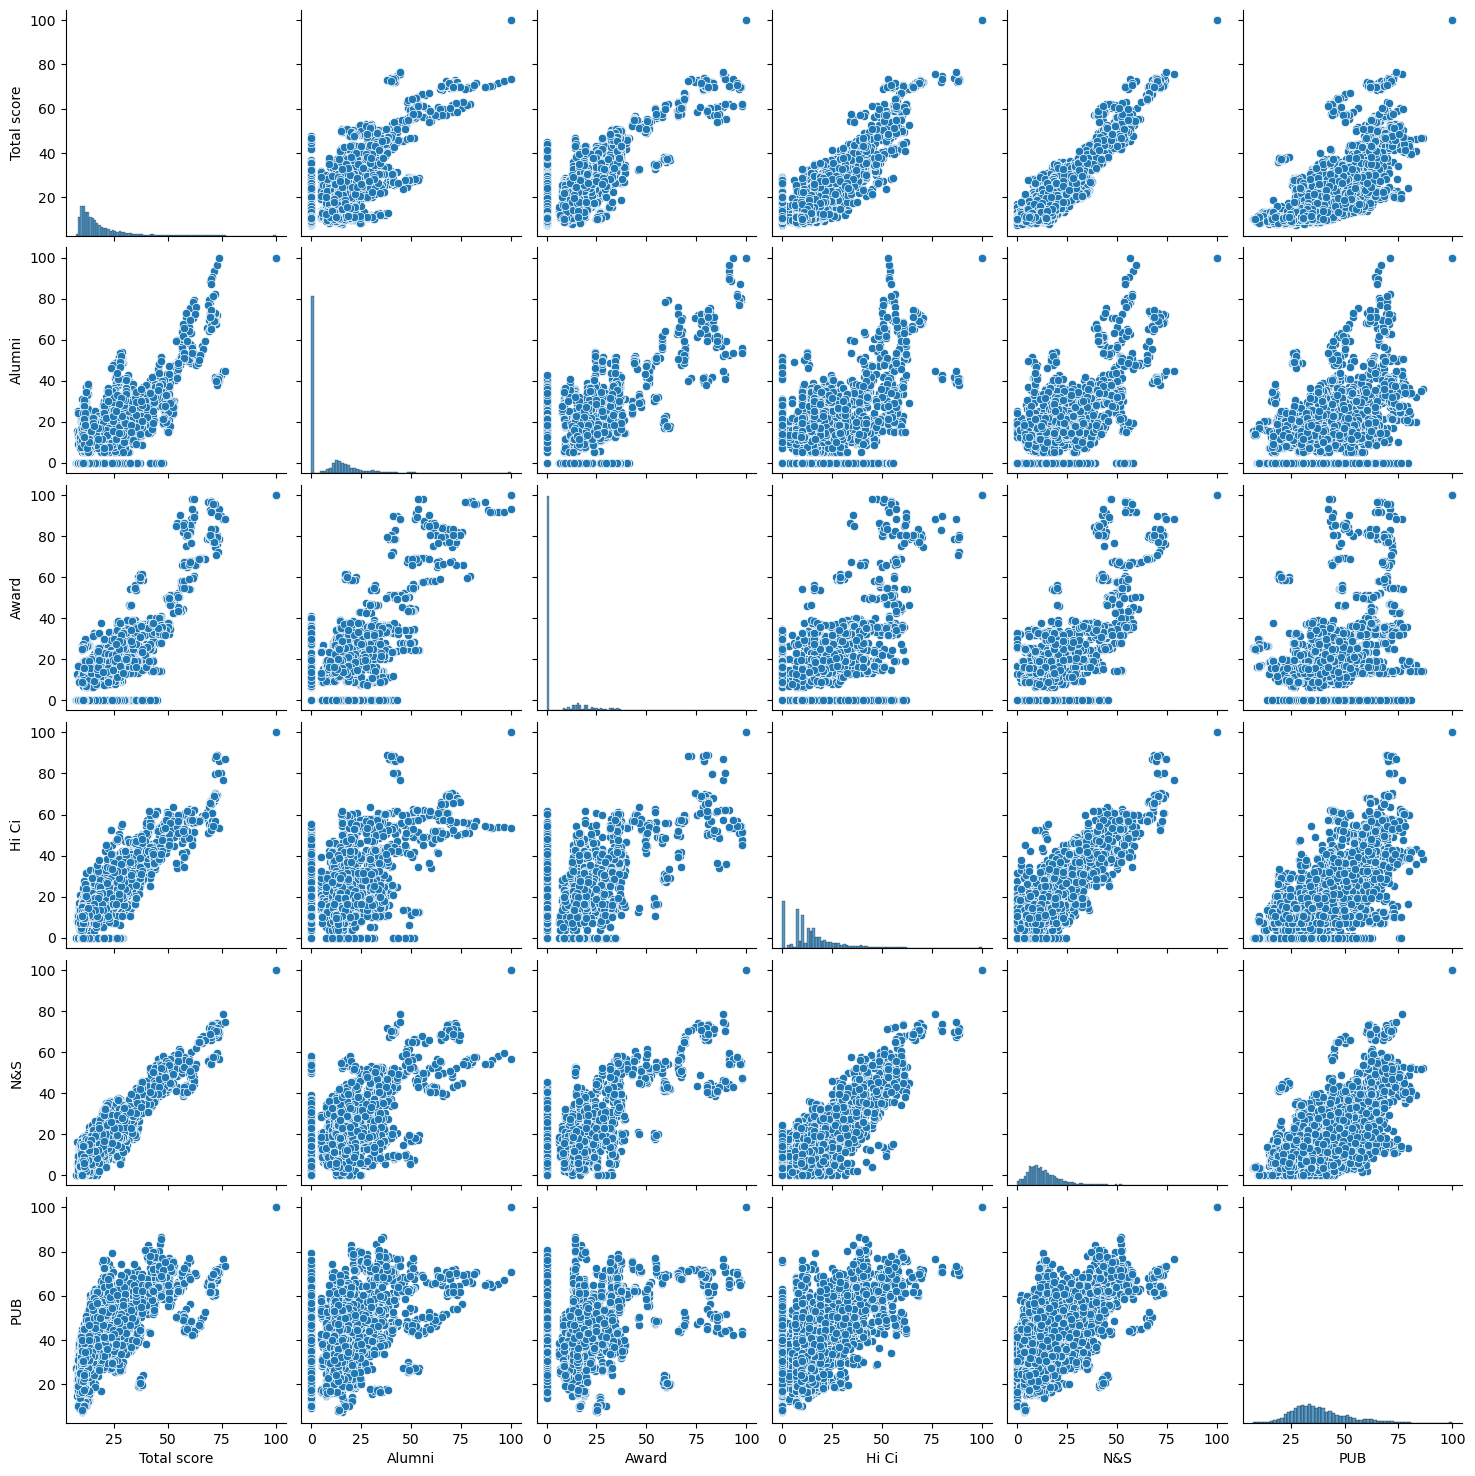

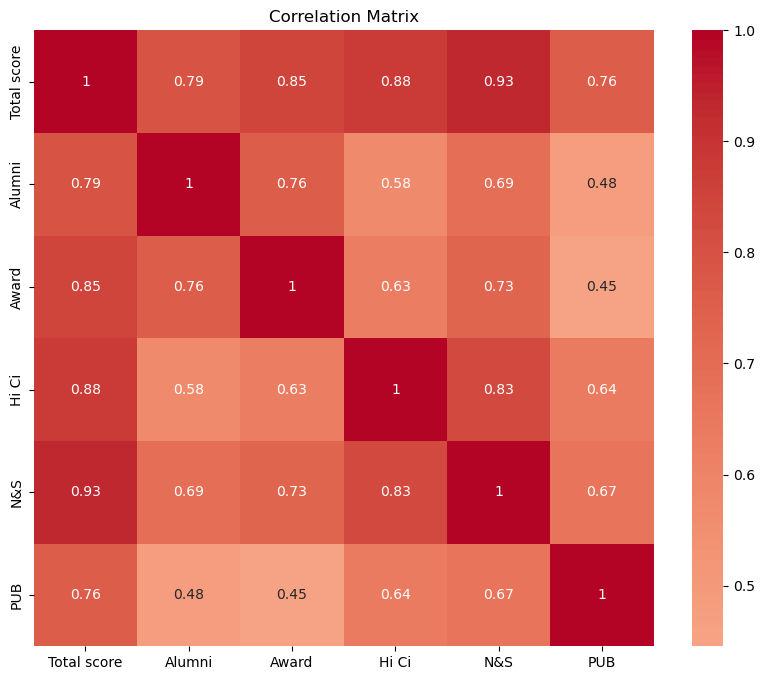

In [ ]:
metrics_for_analysis = ['Total score', 'Alumni', 'Award', 'Hi Ci', 'N&S', 'PUB']

# Create a pairplot for the selected metrics
sns.pairplot(data=df_clean[metrics_for_analysis])
plt.show()

# Calculate the correlation matrix ignoring missing values
correlation_matrix = df_clean[metrics_for_analysis].corr(method='pearson', min_periods=3)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Data Distribution

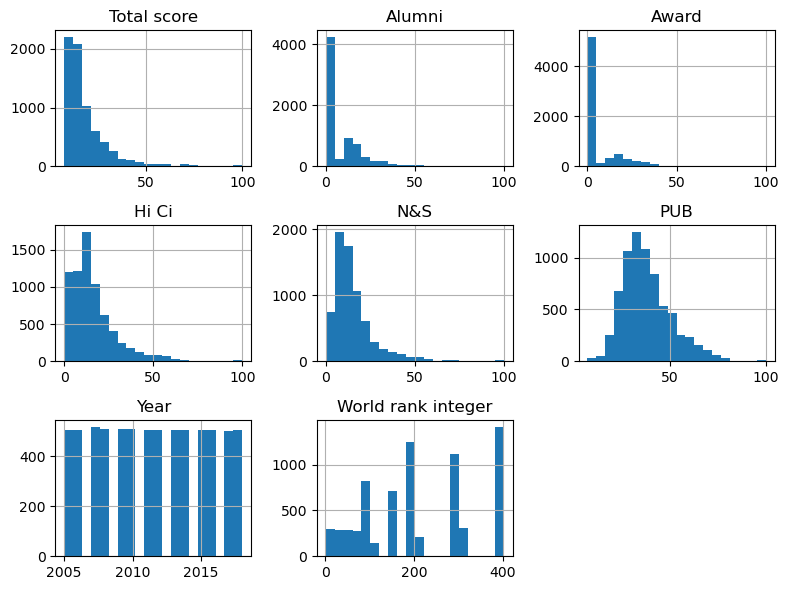

In [ ]:
df_clean.hist(bins=20, figsize=(8, 6))
plt.tight_layout()
plt.show()

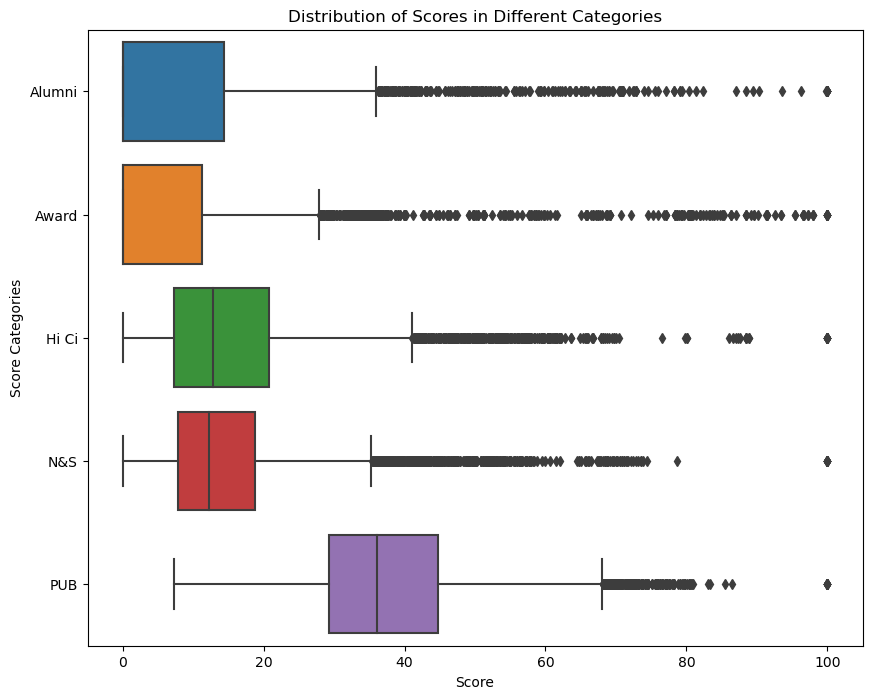

In [ ]:
score_columns = ['Alumni', 'Award', 'Hi Ci', 'N&S', 'PUB']

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_clean[score_columns], orient='h')
plt.xlabel('Score')
plt.ylabel('Score Categories')
plt.title('Distribution of Scores in Different Categories')
plt.show()

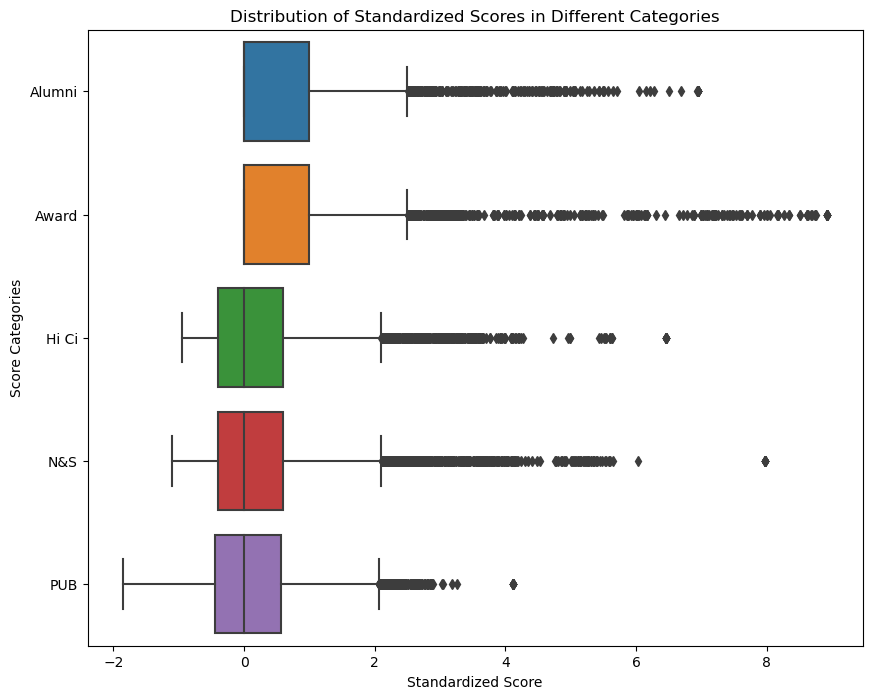

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming df_clean is your DataFrame

# List of score columns
score_columns = ['Alumni', 'Award', 'Hi Ci', 'N&S', 'PUB']

# Initialize the RobustScaler
scaler = RobustScaler()

# Standardize the data for each score category
for column in score_columns:
    df_clean[column] = scaler.fit_transform(df_clean[[column]])

# Create the boxplot after standardizing
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_clean[score_columns], orient='h')
plt.xlabel('Standardized Score')
plt.ylabel('Score Categories')
plt.title('Distribution of Standardized Scores in Different Categories')
plt.show()

# Time Analysis

In [ ]:
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')
df_clean['Year'] = df_clean['Year'].dt.year

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# Convert the 'Year' column to datetime and extract the year
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')
df_clean['Year'] = df_clean['Year'].dt.year

# Group by 'Country' and 'Year', and count the number of unique universities
country_year_counts = df_clean.groupby(['Country', 'Year'])['University'].nunique().reset_index()

# Create a heatmap using Plotly Express with the custom color intervals
fig = go.Figure(data=go.Heatmap(
    x=country_year_counts['Year'],
    y=country_year_counts['Country'],
    z=country_year_counts['University'],
    colorscale='Viridis',  # You can use any predefined colorscale
    zmin=0,  # Set the minimum color value to 0
    zmax=country_year_counts['University'].max(),  # Set the maximum color value
    hoverinfo='x+y+z',  # Display year, country, and universities when hovering
))

fig.update_layout(
    title='Universities per Country per Year',
    xaxis_title='Year',
    yaxis_title='Country'
)

fig.show()


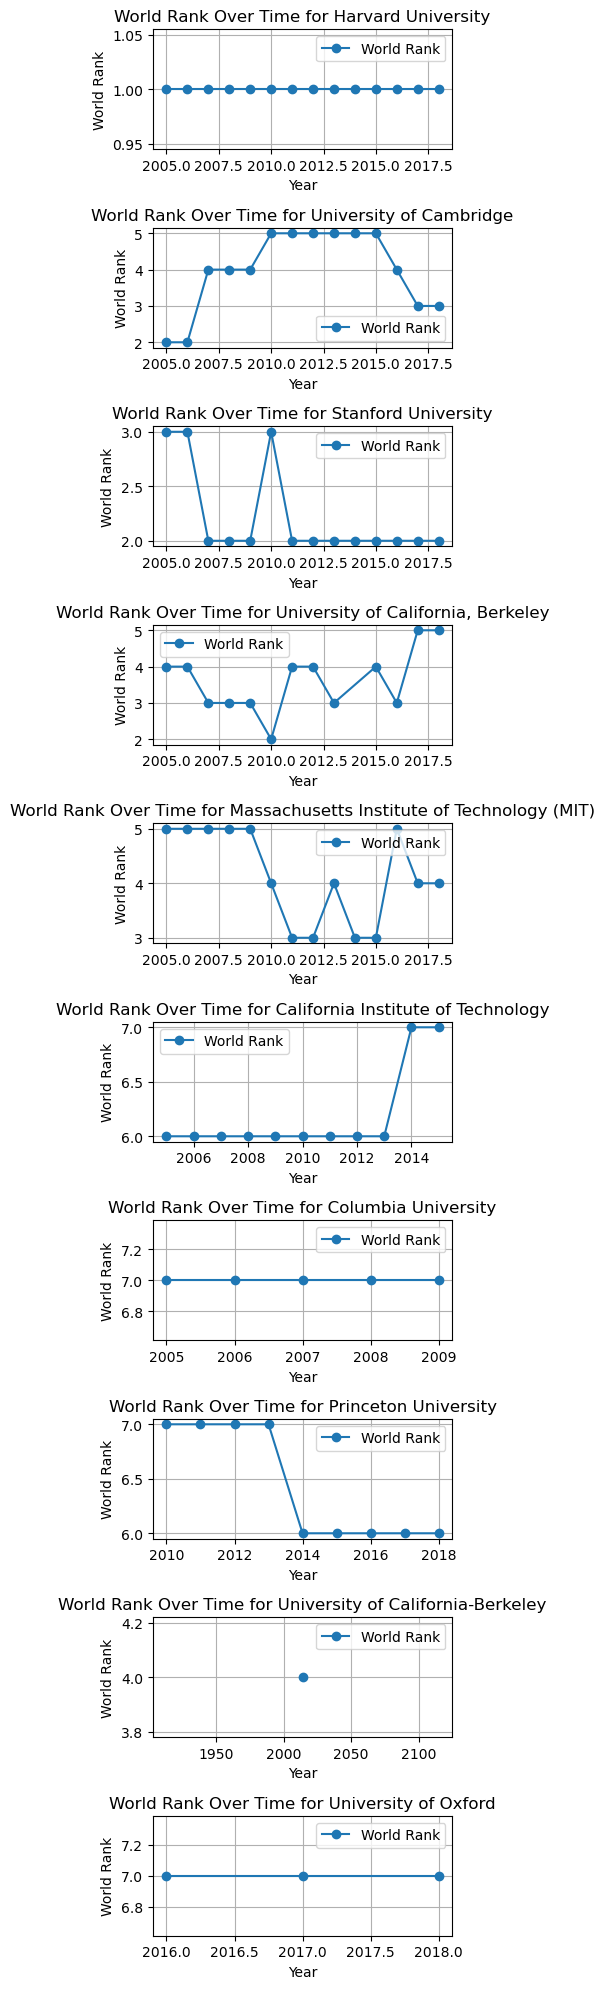

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by Year and World Rank
df_sort_year = df_clean.sort_values(by=["Year", "World rank integer"])
df_sort_year['Year'] = pd.to_datetime(df_sort_year['Year'], format='%Y').dt.year

# Filter the top 8 universities based on world rank
top_8_universities = df_sort_year[df_sort_year['World rank integer'] <= 7]

# Get the list of unique universities within the top 8 ranks
universities_to_plot = top_8_universities['University'].unique()

# Create subplots for each university
fig, axes = plt.subplots(len(universities_to_plot), 1, figsize=(4, 2 * len(universities_to_plot)))

for i, university in enumerate(universities_to_plot):
    university_df = top_8_universities[top_8_universities['University'] == university]
    ax = axes[i]
    ax.plot(university_df['Year'], university_df['World rank integer'], marker='o', label='World Rank')
    ax.set_xlabel('Year')
    ax.set_ylabel('World Rank')
    ax.set_title(f'World Rank Over Time for {university}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
top_universities = df_clean[df_clean['World rank integer'] <=5]
consistent_high_ranking = top_universities.groupby('University')['Year'].count() == top_universities['Year'].nunique()
print("Consistently High-Ranking Universities:")
print(consistent_high_ranking[consistent_high_ranking])

Consistently High-Ranking Universities:
University
Harvard University                             True
Massachusetts Institute of Technology (MIT)    True
Stanford University                            True
University of Cambridge                        True
Name: Year, dtype: bool


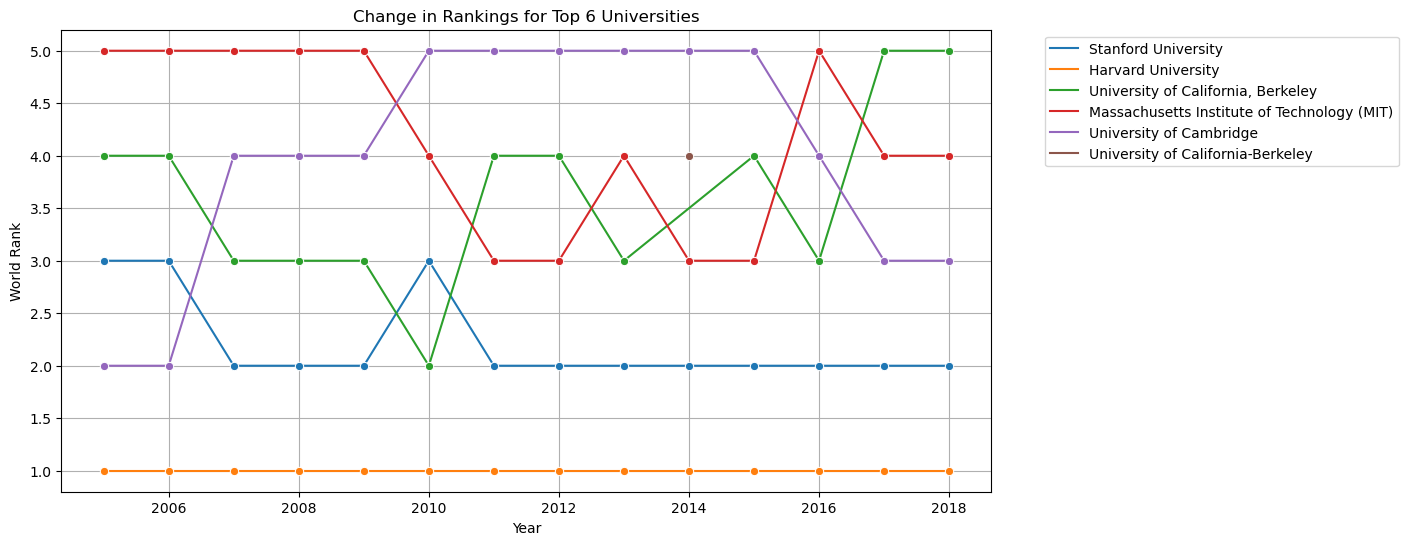

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_universities, x='Year', y='World rank integer', hue='University', marker='o')
plt.title('Change in Rankings for Top 6 Universities')
plt.xlabel('Year')
plt.ylabel('World Rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assume df_clean is your DataFrame containing the relevant data

# Get input from the user
user_input_award = float(input("Enter the value for 'Award': "))

# Create a DataFrame with the user input
user_data = pd.DataFrame({'Award': [user_input_award]})

# Initialize the linear regression model
model = LinearRegression()

# Create a SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the entire dataset and transform the user input
df_clean_imputed = imputer.fit_transform(df_clean[['Award']])
user_data_imputed = imputer.transform(user_data)

# Fit the model on the entire dataset
X = df_clean_imputed
y = df_clean['World rank integer']
model.fit(X, y)

# Make predictions using the trained model
predicted_rank = model.predict(user_data_imputed)

print(f"The predicted university rank for the given input is: {predicted_rank[0]}")


Enter the value for 'Award': 1
The predicted university rank for the given input is: 196.90652990114452


In [ ]:
import pandas as pd

# Assuming df_clean is your DataFrame containing the relevant data

# Get input from the user
given_rank = int(input("Enter the rank you want to search for: "))

# Find the university with the given rank
university_with_given_rank = df_clean[df_clean['World rank integer'] == given_rank]['University'].values

if len(university_with_given_rank) > 0:
    print(f"The university with rank {given_rank} is: {university_with_given_rank[0]}")
else:
    print(f"No university found with rank {given_rank}")


Enter the rank you want to search for: 3
The university with rank 3 is: University of California, Berkeley
